# Red Wine Quality Prediction Project

In [3]:
#Importing necessary libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data collection

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.shape

(1599, 12)

In [7]:
#Checking random records of dataset

df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
960,8.5,0.470,0.27,1.90,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,6
1158,6.7,0.410,0.43,2.80,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,6
818,7.1,0.715,0.00,2.35,0.071,21.0,47.0,0.99632,3.29,0.45,9.4,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
834,8.8,0.685,0.26,1.60,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5


In [8]:
# show top five records

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#checking the unique label values

df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
#  For " good /1" label variable

df.loc[df.quality >= 7, 'quality'] = 1

In [12]:
#checking the unique label values

df.quality.unique()

array([5, 6, 1, 4, 3], dtype=int64)

In [13]:
#  For " not good /0" label variable

df.loc[df.quality > 1, 'quality'] = 0

In [14]:
#checking the unique label values

df.quality.unique()

array([0, 1], dtype=int64)

In [16]:
#number of "good" and "not good "quality of wine

df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [17]:
df.describe().T #since no.of columns are more, therefore using the 'transpose' method

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<AxesSubplot:>

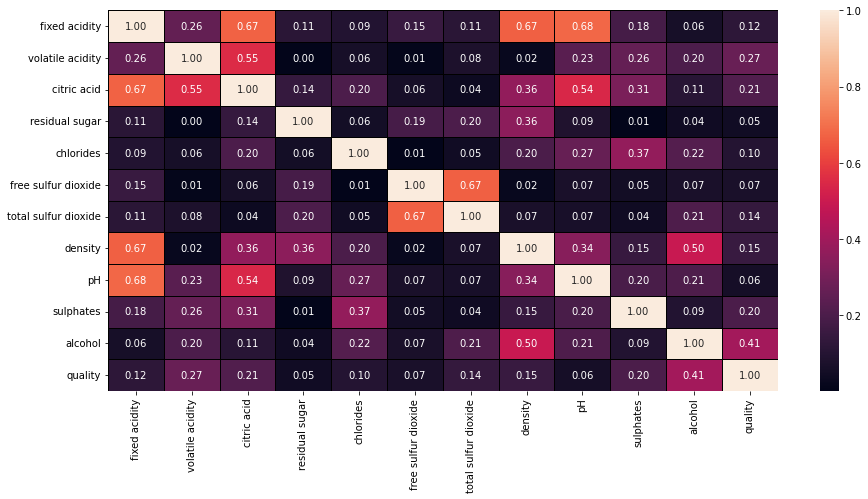

In [18]:
#checking the corelation using heatmaps (only absolute values)

plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f')

In [19]:
#checking the correlations with label in ascending order
df_corr = df.corr().abs()['quality'].sort_values() 
df_corr

residual sugar          0.047779
pH                      0.057283
free sulfur dioxide     0.071747
chlorides               0.097308
fixed acidity           0.120061
total sulfur dioxide    0.139517
density                 0.150460
sulphates               0.199485
citric acid             0.214716
volatile acidity        0.270712
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

<bound method Axes.bar of <AxesSubplot:>>

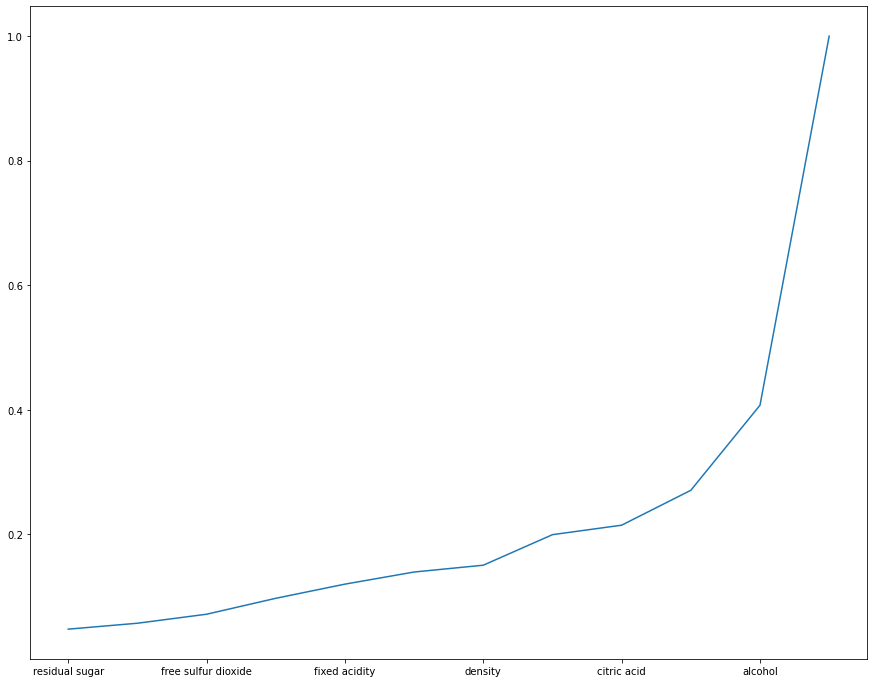

In [20]:
#graphichal representation of correlation with label
plt.figure (figsize = (15,12))
df_corr.plot().bar 

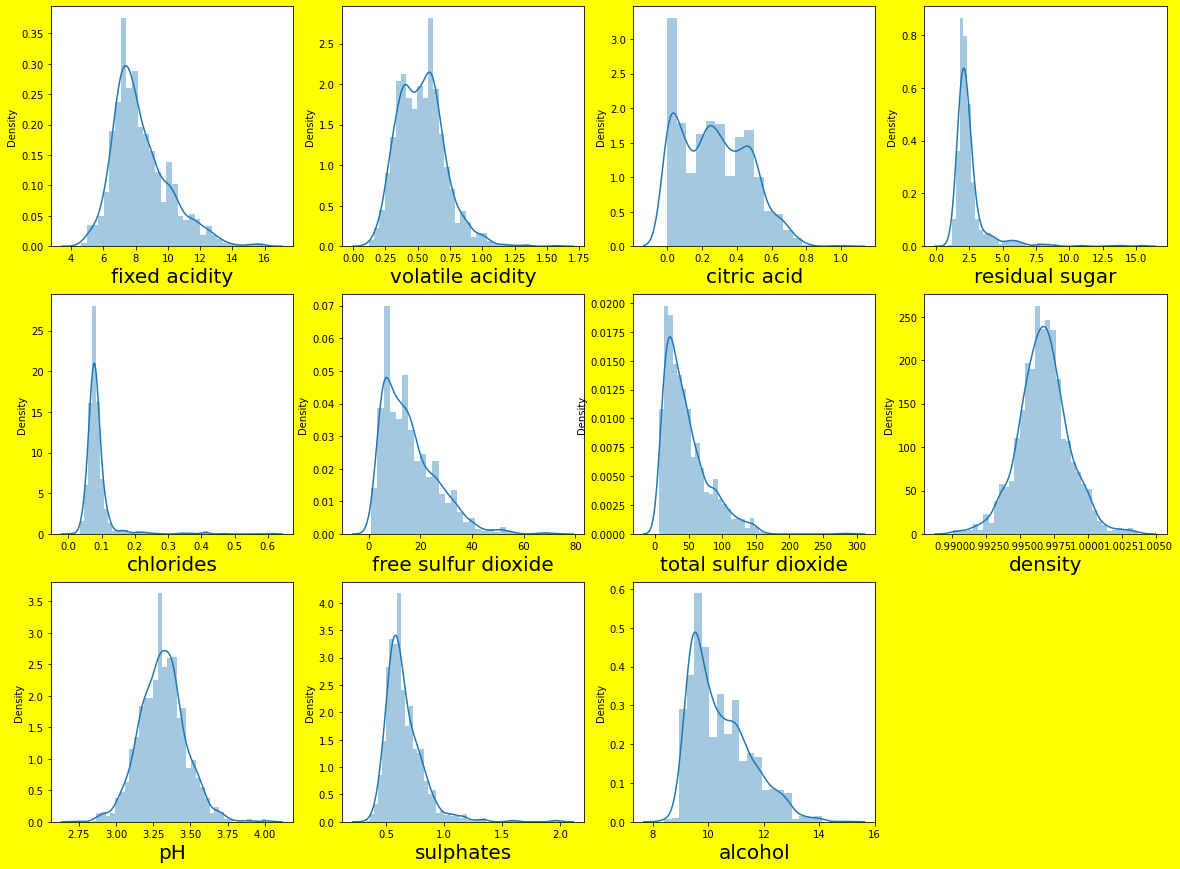

In [21]:
#Checking for data distribution

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <12: #here 11 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.show()

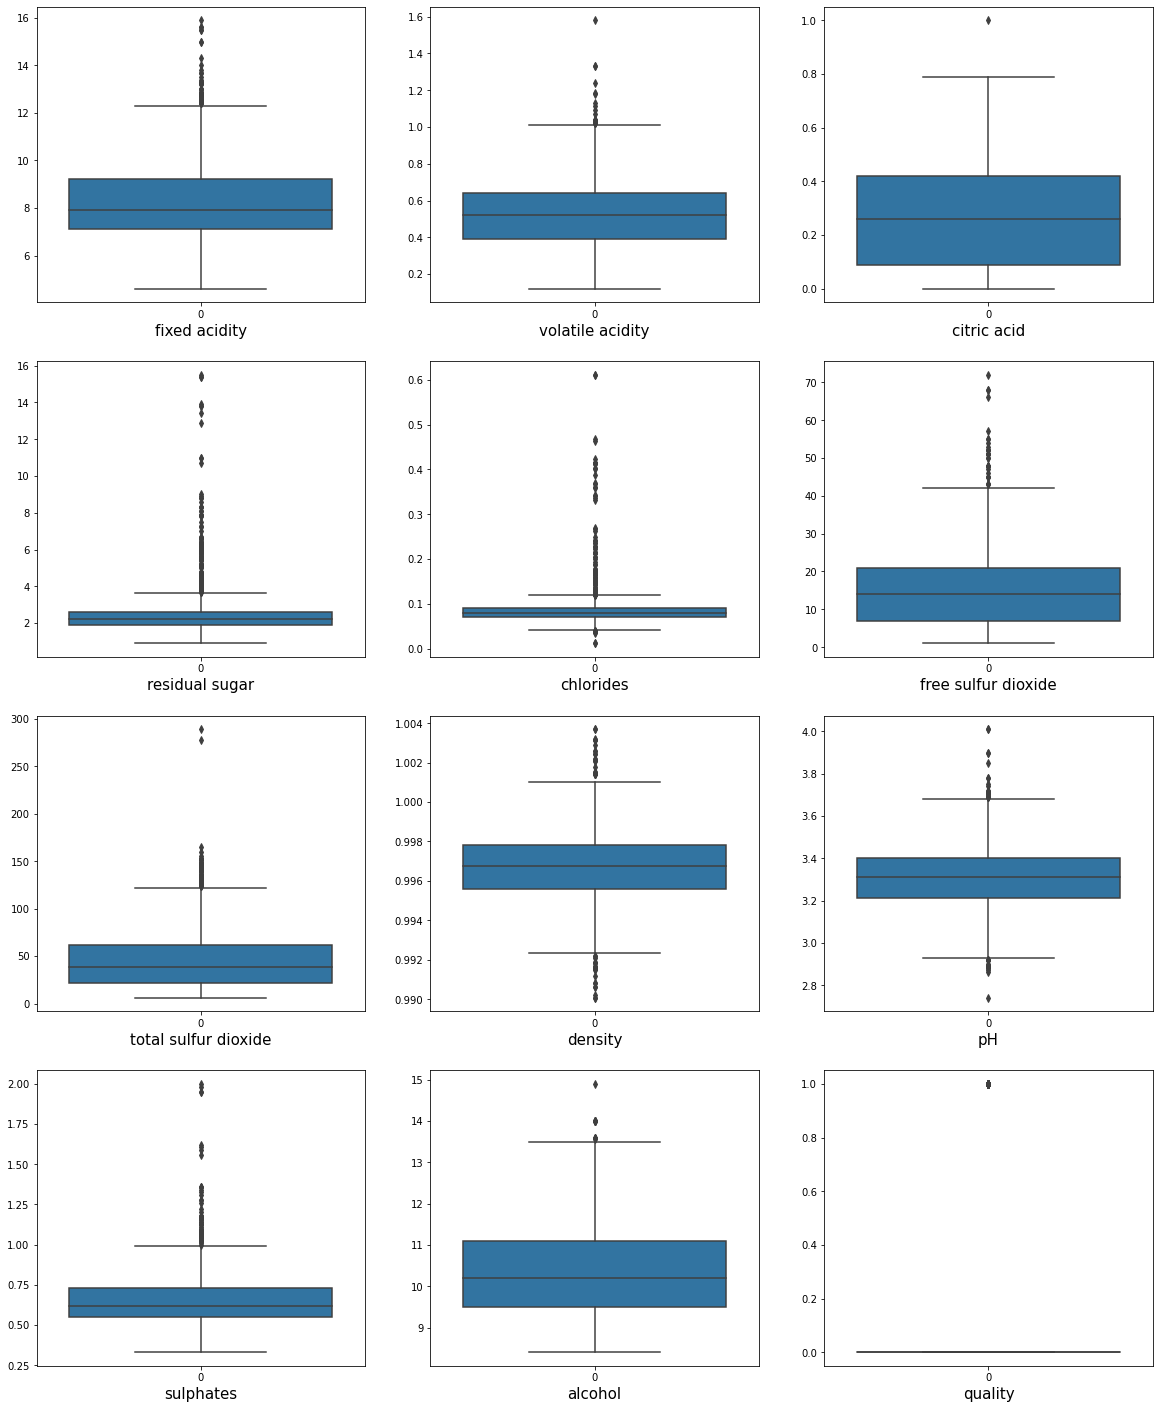

In [22]:
#Checking for outliers

plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=12: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
from scipy.stats import zscore

z_score = zscore (df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                      'total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [25]:
#Checking for Skewness
df.skew().sort_values()

density                 0.055543
pH                      0.113039
citric acid             0.292600
volatile acidity        0.392097
alcohol                 0.757396
fixed acidity           0.820879
free sulfur dioxide     0.869727
sulphates               0.893297
total sulfur dioxide    1.185230
quality                 2.103030
chlorides               2.307274
residual sugar          2.450707
dtype: float64

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
#splitting features & labels

x=df.drop('quality', axis=1)
y= df.quality

In [28]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [30]:
#Using Quantile transformer for skewness removal

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
np_array = qt.fit_transform(x) #this will result in numpy array
np_array

array([[0.34334334, 0.86586587, 0.        , ..., 0.9039039 , 0.28578579,
        0.13963964],
       [0.46596597, 0.96996997, 0.        , ..., 0.20920921, 0.68368368,
        0.36186186],
       [0.46596597, 0.91641642, 0.16266266, ..., 0.34234234, 0.60810811,
        0.36186186],
       ...,
       [0.06406406, 0.48298298, 0.31581582, ..., 0.79029029, 0.8048048 ,
        0.72772773],
       [0.02452452, 0.77377377, 0.3013013 , ..., 0.95745746, 0.73923924,
        0.50950951],
       [0.03103103, 0.0955956 , 0.81731732, ..., 0.71571572, 0.63563564,
        0.72772773]])

In [31]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [32]:
#converting array into dataframe
xt = pd.DataFrame(np_array, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [33]:

xt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.343343,0.865866,0.000000,0.251251,0.406406,0.408408,0.472472,0.752252,0.903904,0.285786,0.139640
1,0.465966,0.969970,0.000000,0.769269,0.869870,0.833834,0.811812,0.524024,0.209209,0.683684,0.361862
2,0.465966,0.916416,0.162663,0.595596,0.798298,0.573073,0.720721,0.575576,0.342342,0.608108,0.361862
3,0.925926,0.058559,0.933934,0.251251,0.374374,0.654154,0.764264,0.788288,0.135135,0.363363,0.361862
4,0.343343,0.865866,0.000000,0.251251,0.406406,0.408408,0.472472,0.752252,0.903904,0.285786,0.139640


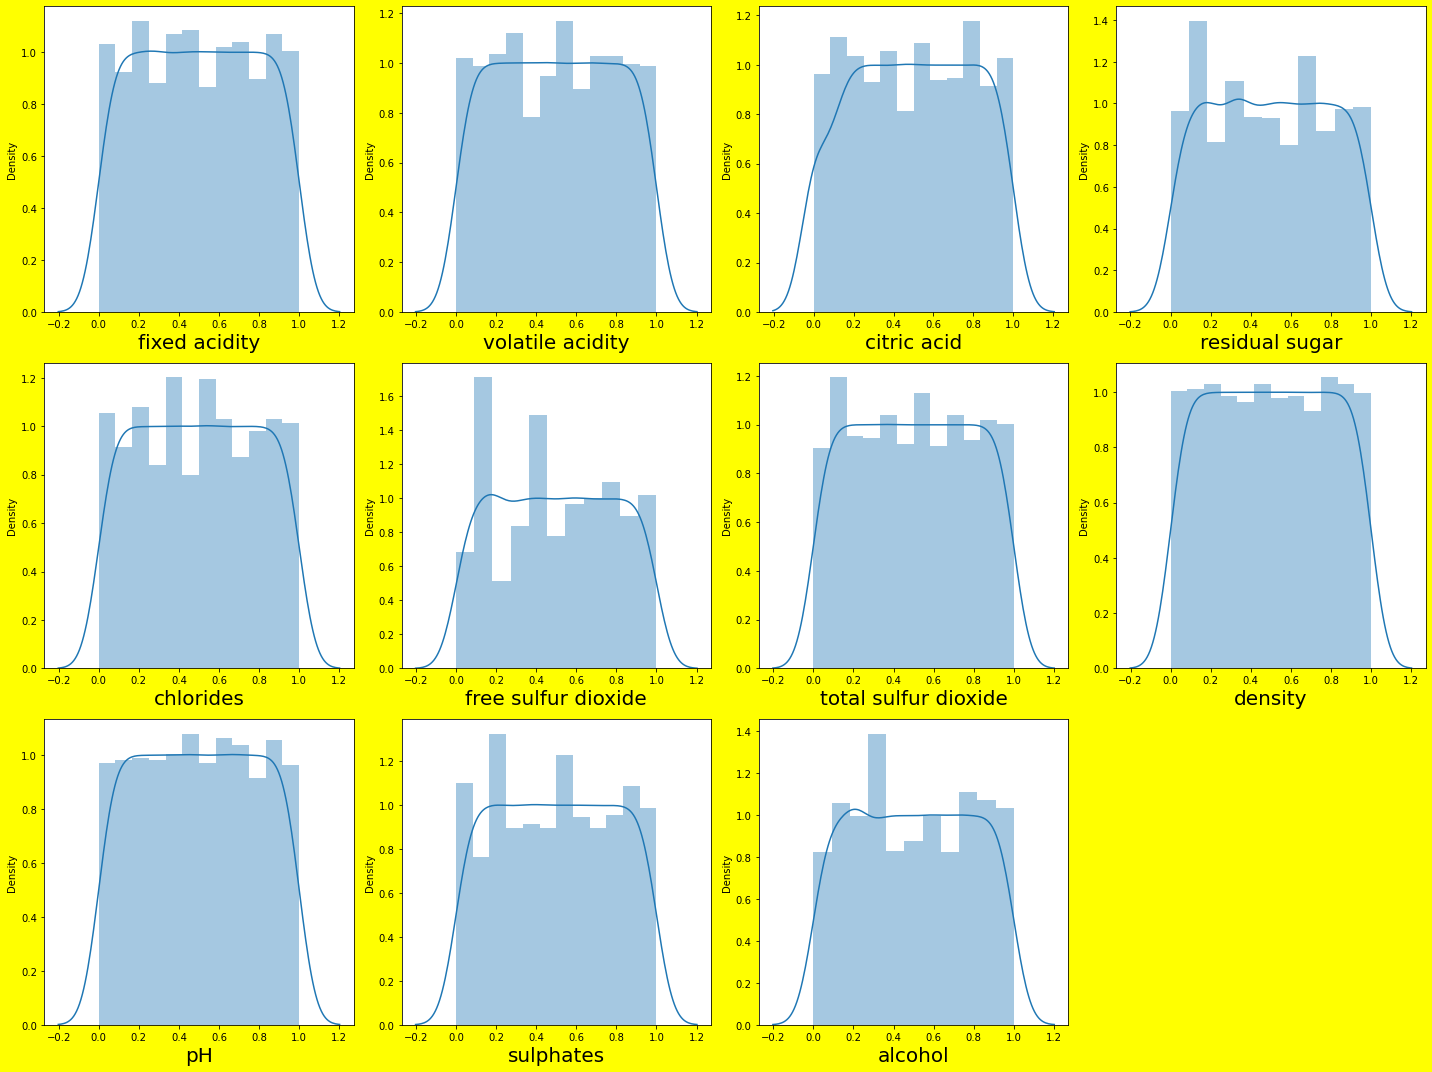

In [34]:
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in xt:
    if plotnumber <12: #here 11 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (xt [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

<AxesSubplot:xlabel='quality', ylabel='count'>

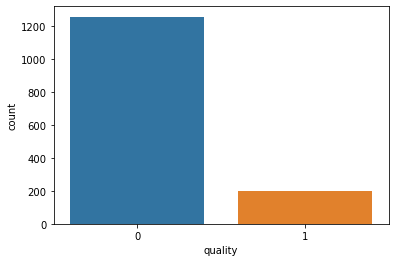

In [30]:
sns.countplot(y)

# Train -Test split

In [35]:

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets

x_train,x_test,y_train,y_test = train_test_split (xt, y, test_size = 0.2, random_state = 42)

In [36]:
print(xt.shape, x_train.shape, x_test.shape)

(1458, 11) (1166, 11) (292, 11)


In [37]:
print(y.shape, y_train.shape, y_test.shape)

(1458,) (1166,) (292,)


# Model Training

In [38]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(x_test)

# Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.886986301369863
Confusion Matrix:
 [[252   6]
 [ 27   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       258
           1       0.54      0.21      0.30        34

    accuracy                           0.89       292
   macro avg       0.72      0.59      0.62       292
weighted avg       0.86      0.89      0.86       292



In [40]:
x_train, x_test, y_train, y_test = train_test_split (xt, y, test_size = 0.2, random_state = 11)

In [41]:
import six
import joblib
import sys
sys.modules ['sklearn.externals.six'] = six
sys.modules ['sklearn.externals.joblib'] = joblib

In [42]:
!pip install imbalanced-learn

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
ovr_spl = SMOTE()
x_train_ns, y_train_ns = ovr_spl.fit_resample (x_train, y_train)

import warnings
warnings.filterwarnings('ignore')

# XGBClassifier

In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train_ns, y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [47]:
y_pred = model.predict(x_test)

y_pred 

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [48]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8904109589041096

#  KNNClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [50]:
knn.fit(x_train_ns, y_train_ns)
y_pred = knn.predict (x_test)

In [51]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.773972602739726

#  Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_ns, y_train_ns)
y_pred = dtc.predict (x_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.863013698630137

# SVM

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns, y_train_ns)
y_pred = svc.predict (x_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8321917808219178

# Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [58]:
ada.fit(x_train_ns, y_train_ns)
y_pred = ada.predict (x_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.821917808219178

# Here we see that XGBClassifier works the best in this dataset with accuracy 89%.

# AUC- RUC Curve

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

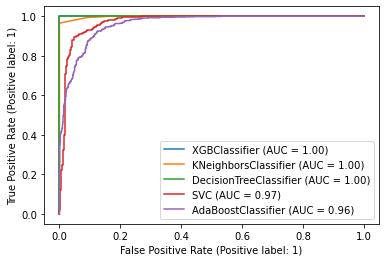

In [61]:
#For Training Data
disp = plot_roc_curve (model, x_train_ns, y_train_ns)
plot_roc_curve (knn, x_train_ns, y_train_ns, ax = disp.ax_)
plot_roc_curve (dtc, x_train_ns, y_train_ns, ax = disp.ax_)
plot_roc_curve (svc, x_train_ns, y_train_ns, ax = disp.ax_)
plot_roc_curve (ada, x_train_ns, y_train_ns, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

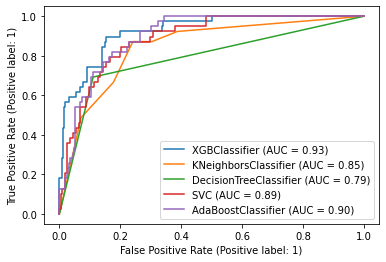

In [62]:
#For Tetsing Data
disp = plot_roc_curve (model, x_test, y_test)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

# Hyper Parameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV, KFold

In [66]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [65]:

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs2.fit(x_train_ns, y_train_ns)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.9228253352073712
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}


In [67]:
xgb = XGBClassifier(n_estimator = 500, base_score = 0.5,learning_rate = 0.1, reg_aplha = 0, reg_lamdba = 0.5)
xgb.fit(x_train_ns, y_train_ns)
y_pred = xgb.predict (x_test)

[17:50:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator", "reg_aplha", "reg_lamdba" } are not used.



In [69]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8972602739726028

# The Accuracy is Same as before.

# END